
# Project: Investigate a Dataset - [No-Show Appointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> In this dataset, we have more than a hundred thousand entries for medical appointment in Brazil.
We will focus on the question of whether or not patients showed up for their appointment. We will also focus on the differencies in the features of those who kept to their appointment and how they differ from those who didn't keep to their appointment. 
Note: In the No-show column of this data, if it says 'No' it means the patient showed up to their appointment, and 'Yes' if they did not show up.

### Question(s) for Analysis
>What factors are important for us to know in order to predict if a patient will show for their scheduled appointment.

>What factors were responsible for patients missing their appointment?

In [1]:
#import numpy, pandas, matplotlib and seaborn
import numpy as np #
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties 

In [2]:
#load dataset
df = pd.read_csv('Noshowappointments-kagglev2-may-2016.csv')

In [3]:
# Load the data and print out a few lines. 
df.head(10) 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [4]:
#Let us take a look at the shape of our dataset
df.shape

(110527, 14)

*This shows us that there were 110527 rows which indicates enteries or patient appointments and 14 columns which indicates the different features.

In [5]:
#We will also take a look at the information of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#Then we will glance at information contained in each cell
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


*This shows us the various floats and integers characters, we can see from here that we have a minimum value of -1 for age which is abnormal.

In [7]:
#Let us check for unique values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

*From this output we can see that the PatientId was 62299 while the AppointmentID was 110527 enteries indicating the Patients had one or more appointments.*
*Some of the features are misspelt like Hipertension, Handcap etc*
*There are 81 neighbourhoods in this enteries.**

In [8]:
#Check for null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

*There are no null values in this dataset.*

In this dataset we have the following:

    1) 110527 rows or enteries and 14 columns or features.

    2) The PatientId had unique values which means that some patients had more than one visits.
    
    3) Some of the column names were wrongly spelt and will be renamed during the cleaning stage.
    
    4) The 'Age' column had a minimum value of -1 which is not normal and this row(s) will be dropped during the cleaning of this dataset.
    
    5) 'No-show' column as stated earlier had "Yes" and "No" values, "Yes" representing those who did not show up for their appointment and "No" for those who showed up for their appointment.
    
    6) 'No-show' will be the dependent variable for this analysis and I will be picking four other features as the independent variables for this analysis and they include ('Age', 'Gender', 'Hypertension', 'Diabetes', 'Alcoholism','Scholarship' (Bolsa Familia Program) and 'SMS_received'), the others will be dropped.
    


### Data Cleaning 

In [9]:
df.rename(columns={'Hipertension':'Hypertension'}, inplace=True)
df.rename(columns={'Handcap':'Handicap'}, inplace=True)
#Some columns need to be renamed so as to pass on the right message to the viewer

In [10]:
df.head()
#Check to see if the errors in the names were corrected.

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
#Drop columns that will not be used analysis in this work.
df.drop(['PatientId', 'Neighbourhood', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Handicap'], axis=1, inplace=True)

In [12]:
#Check again to see if cells were dropped.
df.head()

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,SMS_received,No-show
0,F,62,0,1,0,0,0,No
1,M,56,0,0,0,0,0,No
2,F,62,0,0,0,0,0,No
3,F,8,0,0,0,0,0,No
4,F,56,0,1,1,0,0,No


*Columns that will not be used for this analysis are dropped as we are required to have one dependent variable and a minimum of three independent variables.

In [13]:
#Discard the ages below zero
df[df["Age"] == -1]

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,SMS_received,No-show
99832,F,-1,0,0,0,0,0,No


*In the column with Age, the minimum value was -1 which is not true as one cannot have age of -1, therefore the row with the age of -1 will be deleted the entire dataset

In [14]:
#Drop row with age of -1
df.drop(index=df[df["Age"]==-1].index, inplace=True)
#Check if the row with age of -1 is removed
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000


*After removing the row with age of -1, it is checked again to confirm if it was implemented

*Checking through the dataset, it is now time for us to move on to the next step of the project, exploring the data which we shall see shortly.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (What factors are important for us to know in order to predict if a patient will show for their scheduled appointment).

### Research Question 2  (What factors were responsible for patients missing their appointment?).

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Scholarship'}>],
       [<AxesSubplot:title={'center':'Hypertension'}>,
        <AxesSubplot:title={'center':'Diabetes'}>],
       [<AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'SMS_received'}>]], dtype=object)

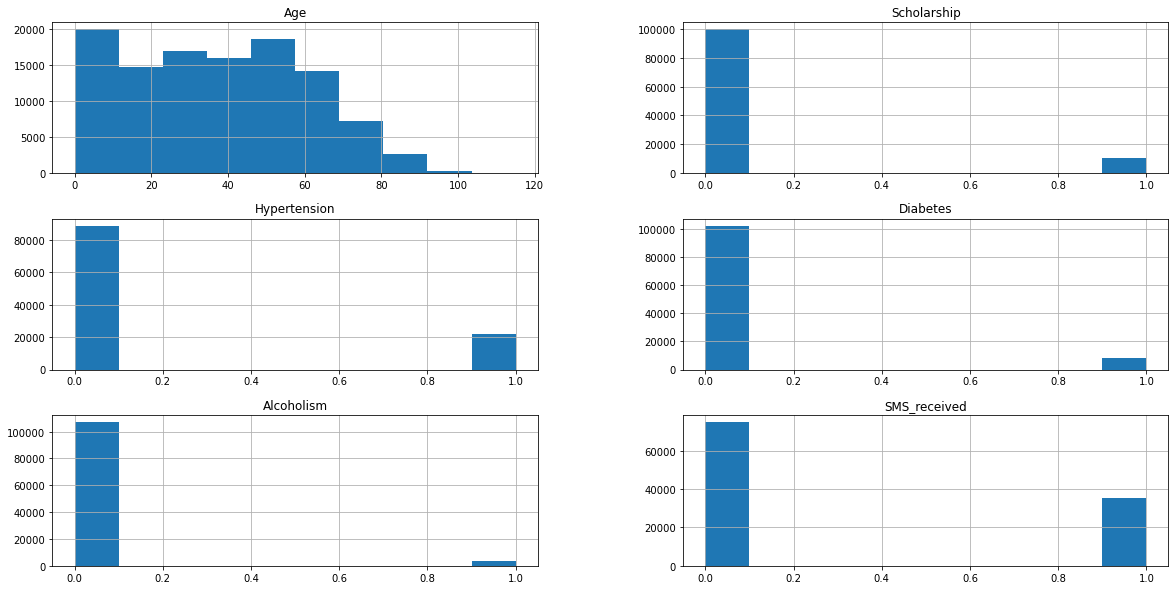

In [15]:
df.hist(figsize=(20, 10))

*From the above graphs, we can say the following:

Age: The age of the population set is skewed to the right, meaning we have more of the population below 60 years of age.

Scholarship: Almost 100,000 patients did not have the health insurance while less than 20,000 patients were registered in the scheme.

Hypertension: More than 80,000 patients did not have hypertension while more than 20,000 patients were hypertensive.

Diabetes: More than 100,000 patients were not diabetic while less than 20,000 patients were diabetic.

Alcoholism: More than 100,000 patients were not alcoholics while less than 20,000 patients were alcoholics.

SMS_received: More than 60,000 patients did not receive SMS while close to 40,000 patients received SMS. 

In [16]:
#Get the number of those who showed up for their appointments and those who didn't.
df['No-show'].value_counts()

No     88207
Yes    22319
Name: No-show, dtype: int64

In [17]:
#Get the percentage of those who missed their appointments and those who didn't
df['No-show'].value_counts(normalize=True) * 100

No     79.806561
Yes    20.193439
Name: No-show, dtype: float64

In [18]:
#Mask up the hospital appointment attendance
Showedup = df['No-show'] == 'No'
Noshow = df['No-show'] == 'Yes'

*No show: 88207 patients making up 79.81% of the population showed up for their appointment while 22319 making up 20.19% did not show up for their appointment.*

###Question 1: Factors in order to predict if a patient will show up for their appointment###

###Question 2: Factors responsible for patients missing their appointment.###


**Is the gender of the patient a predicator for showing up for their appointment?**
**Is gender responsible for patients missing their appointment?**

In [19]:
#Get the number and percentage of males and females in the dataset.
df['Gender'].value_counts(), df['Gender'].value_counts(normalize=True) * 100

(F    71839
 M    38687
 Name: Gender, dtype: int64,
 F    64.997376
 M    35.002624
 Name: Gender, dtype: float64)

In [20]:
#Get the number and percentage of males and females who showed up and didn't show up for their appointments.
df.groupby(['Gender'])['No-show'].value_counts(), df.groupby(['Gender'])['No-show'].value_counts(normalize=True) * 100

(Gender  No-show
 F       No         57245
         Yes        14594
 M       No         30962
         Yes         7725
 Name: No-show, dtype: int64,
 Gender  No-show
 F       No         79.685129
         Yes        20.314871
 M       No         80.032052
         Yes        19.967948
 Name: No-show, dtype: float64)

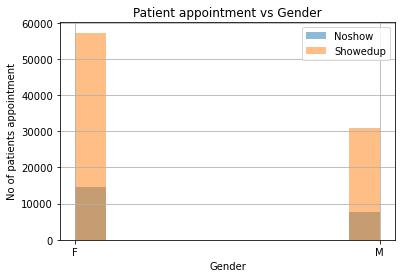

In [21]:
#Plot a graph representing gender and who showed up and didn't show up for their appointments
def Hist_plot_attendance(Gender, Showedup, Noshow):
    df.Gender[Noshow].hist(alpha=0.5, label='Noshow')
    df.Gender[Showedup].hist(alpha=0.5, label='Showedup')
    plt.ylabel('No of patients appointment')
    plt.xlabel('Gender')
    plt.title('Patient appointment vs Gender')
    plt.legend();

Hist_plot_attendance(df.Gender, Showedup, Noshow)

*For the gender, 71839 (65.00%) are females while 38687 (35.00%) are males. 79.69% of the females showed up for their appointment while 20.31% did not show up and 80.00% of the males showed up for their appointment and 20.00% did not show up.*

*Above is the graphical representation of No-show Vs the Gender*
From the graph we can see that more females showed up for their appointment when compared with the males. 

*This is because we had a higher female population in the dataset when compared to the males. But when further analysis is done the males had a slightly higher percentage of showing up for their appointment.

**Is the age of the patient a predicator for showing up for their appointment?**
**Is the age responsible for patients missing their appointment?**

In [22]:
#Get the number and percentage of Ages in the dataset.
df['Age'].value_counts(), df['Age'].value_counts(normalize=True) * 100

(0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 98        6
 115       5
 100       4
 102       2
 99        1
 Name: Age, Length: 103, dtype: int64,
 0      3.201962
 1      2.056530
 52     1.579719
 49     1.494671
 53     1.493766
          ...   
 98     0.005429
 115    0.004524
 100    0.003619
 102    0.001810
 99     0.000905
 Name: Age, Length: 103, dtype: float64)

In [23]:
#Get the number and percentage of Ages who showed up and didn't show up for their appointments.
df.groupby(['Age'])['No-show'].value_counts(), df.groupby(['Age'])['No-show'].value_counts(normalize=True) * 100

(Age  No-show
 0    No         2900
      Yes         639
 1    No         1858
      Yes         415
 2    No         1366
                 ... 
 99   No            1
 100  No            4
 102  No            2
 115  Yes           3
      No            2
 Name: No-show, Length: 203, dtype: int64,
 Age  No-show
 0    No          81.944052
      Yes         18.055948
 1    No          81.742191
      Yes         18.257809
 2    No          84.425216
                    ...    
 99   No         100.000000
 100  No         100.000000
 102  No         100.000000
 115  Yes         60.000000
      No          40.000000
 Name: No-show, Length: 203, dtype: float64)

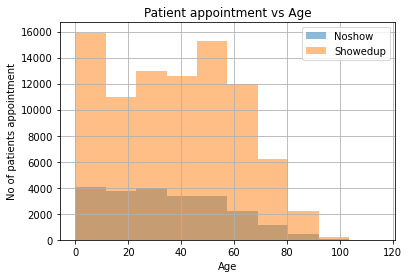

In [24]:
#Plot the graph of age against the number of patient visitation
def Hist_plot_attendance(Age, Showedup, Noshow):
    df.Age[Noshow].hist(alpha=0.5, label='Noshow')
    df.Age[Showedup].hist(alpha=0.5, label='Showedup')
    plt.ylabel('No of patients appointment')
    plt.xlabel('Age')
    plt.title('Patient appointment vs Age')
    plt.legend();

Hist_plot_attendance(df.Age, Showedup, Noshow)

*The graph is skewed to the right with the younger population having a higher attendance, we can see the highest hospital visitation in babies below a year and the least in patients of 96 years. This implies that parents do well to take their children for their appointment.*
From the graph, children below the age of 2 showed up the highest for their appointment, this could be as a result of having the highest population. 

**Is having a scholarship a predicator for showing up for their appointment?**
**Is having a scholarship responsible for patients missing their appointment?**

In [25]:
#Get the number and percentage of those who have and didn't have scholarships.
df['Scholarship'].value_counts(), df['Scholarship'].value_counts(normalize=True) * 100

(0    99665
 1    10861
 Name: Scholarship, dtype: int64,
 0    90.173353
 1     9.826647
 Name: Scholarship, dtype: float64)

In [26]:
#Get the number and percentage of those who have and didn't have scholarships and showed up and didn't show up for their appointments.
df.groupby(['Scholarship'])['No-show'].value_counts(), df.groupby(['Scholarship'])['No-show'].value_counts(normalize=True) * 100

(Scholarship  No-show
 0            No         79924
              Yes        19741
 1            No          8283
              Yes         2578
 Name: No-show, dtype: int64,
 Scholarship  No-show
 0            No         80.192645
              Yes        19.807355
 1            No         76.263696
              Yes        23.736304
 Name: No-show, dtype: float64)

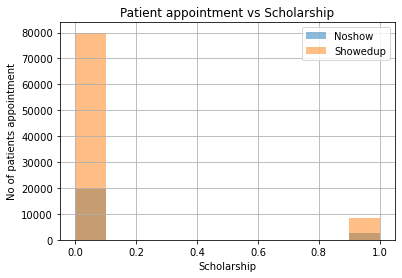

In [27]:
#Plot a graph representing those who got an SMS and didn't and who showed up and didn't show up for their appointments
def Hist_plot_attendance(Scholarship, Showedup, Noshow):
    df.Scholarship[Noshow].hist(alpha=0.5, label='Noshow')
    df.Scholarship[Showedup].hist(alpha=0.5, label='Showedup')
    plt.ylabel('No of patients appointment')
    plt.xlabel('Scholarship')
    plt.title('Patient appointment vs Scholarship')
    plt.legend();

Hist_plot_attendance(df.Scholarship, Showedup, Noshow)

*99665 (90.17%) are not on the scholarship while 10861 (9.83%) are not on the scholarship. 80.19% of those who didn't have the scholarship showed up for their appointment while the other 19.81% did not show up and 76.26% of those who had the scholarship showed up for their appointment and the other 23.74% didn't show up for their appointment.
Therefore not having a scholarship made the patients not to miss their appointments while having one made them not to show up for their appointment.

*Above is the graphical representation of No-show Vs Scholarship*


**Is sending an SMS to the patient a predicator for showing up for their appointment?**
**Is sending an SMS to the patient responsible for patients missing their appointment?**

In [28]:
#Get the number and percentage of those who have and didn't have scholarships.
df['SMS_received'].value_counts(), df['SMS_received'].value_counts(normalize=True) * 100

(0    75044
 1    35482
 Name: SMS_received, dtype: int64,
 0    67.897146
 1    32.102854
 Name: SMS_received, dtype: float64)

In [29]:
#Get the number and percentage of those who have and didn't have scholarships and showed up and didn't show up for their appointments.
df.groupby(['SMS_received'])['No-show'].value_counts(), df.groupby(['SMS_received'])['No-show'].value_counts(normalize=True) * 100

(SMS_received  No-show
 0             No         62509
               Yes        12535
 1             No         25698
               Yes         9784
 Name: No-show, dtype: int64,
 SMS_received  No-show
 0             No         83.296466
               Yes        16.703534
 1             No         72.425455
               Yes        27.574545
 Name: No-show, dtype: float64)

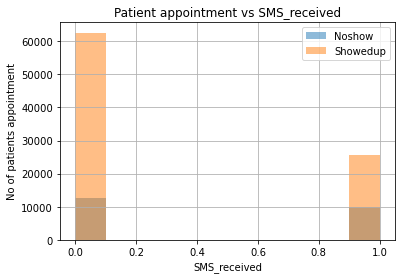

In [30]:
#Plot a graph representing those who got an SMS and didn't and who showed up and didn't show up for their appointments
def Hist_plot_attendance(SMS_received, Showedup, Noshow):
    df.SMS_received[Noshow].hist(alpha=0.5, label='Noshow')
    df.SMS_received[Showedup].hist(alpha=0.5, label='Showedup')
    plt.ylabel('No of patients appointment')
    plt.xlabel('SMS_received')
    plt.title('Patient appointment vs SMS_received')
    plt.legend();

Hist_plot_attendance(df.SMS_received, Showedup, Noshow)


*75044(67.90%) did not receive a message while 35482(32.10%) did not. 83.30% of those who received a message showed up for their appointment while the other 16.70% didn't show up for their appointment. 72.43% of those who got messages for their appointment showed up while the other 27.57% did not show up.*

*Above is a graph of the No-show Vs SMS_received.

**Does having a scholarship and sending patient an SMS a predicator for showing up for their appointment?**
**Does having a scholarship and sending patient an SMS responsible for patients missing their appointment?**

In [31]:
df.groupby(['Scholarship', 'SMS_received'])['No-show'].value_counts(normalize=True) * 100

Scholarship  SMS_received  No-show
0            0             No         83.540657
                           Yes        16.459343
             1             No         73.105670
                           Yes        26.894330
1            0             No         81.049483
                           Yes        18.950517
             1             No         66.219686
                           Yes        33.780314
Name: No-show, dtype: float64

*From the above analysis, those who did not have a scholarship and did not receive an SMS had the highest hospital visitation of 83.54% while those who had both scholarship and received an SMS had the least hospital visitation of 66.21%.*

**Is the being hypertensive a predicator for showing up for their appointment?**
**Is the being hypertensive responsible for patients missing their appointment?**

In [32]:
#Get the number and percentage of those who were and weren't hypertensive.
df['Hypertension'].value_counts(), df['Hypertension'].value_counts(normalize=True) * 100

(0    88725
 1    21801
 Name: Hypertension, dtype: int64,
 0    80.275229
 1    19.724771
 Name: Hypertension, dtype: float64)

In [33]:
#Get the number and percentage of those who have and didn't have hypertension and showed up and didn't show up for their appointments.
df.groupby(['Hypertension'])['No-show'].value_counts(), df.groupby(['Hypertension'])['No-show'].value_counts(normalize=True) * 100

(Hypertension  No-show
 0             No         70178
               Yes        18547
 1             No         18029
               Yes         3772
 Name: No-show, dtype: int64,
 Hypertension  No-show
 0             No         79.096083
               Yes        20.903917
 1             No         82.698041
               Yes        17.301959
 Name: No-show, dtype: float64)

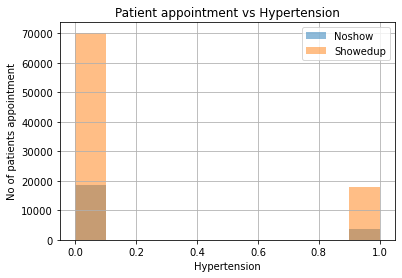

In [34]:
#Plot a graph representing those who are hypertensive and are not and didn't and who showed up and didn't show up for their appointments
def Hist_plot_attendance(Hypertension, Showedup, Noshow):
    df.Hypertension[Noshow].hist(alpha=0.5, label='Noshow')
    df.Hypertension[Showedup].hist(alpha=0.5, label='Showedup')
    plt.ylabel('No of patients appointment')
    plt.xlabel('Hypertension')
    plt.title('Patient appointment vs Hypertension')
    plt.legend();

Hist_plot_attendance(df.Hypertension, Showedup, Noshow)


*88725 (80.28%) are hypertensive while 21801 (19.72%) are not. 79.10% of those who are not hypertensive showed up for their appointment while the other 20.90% didn't show up for their appointment. 82.70% of those who were hypertensive showed up for their appointment while the other 17.30% did not show up.*

Therefore those who were hypertensive are more likely to show up for their appointment.

*Above is the graphical representation of No-show Vs Hypertension*

**Is being diabetic a predicator for patients showing up for their appointment?**
**Is being diabetic responsible for patients missing their appointment?**

In [35]:
#Get the number and percentage of those who were and weren't diabetic.
df['Diabetes'].value_counts(), df['Diabetes'].value_counts(normalize=True) * 100

(0    102583
 1      7943
 Name: Diabetes, dtype: int64,
 0    92.813456
 1     7.186544
 Name: Diabetes, dtype: float64)

In [36]:
#Get the number and percentage of those who have and didn't have diabetes and showed up and didn't show up for their appointments.
df.groupby(['Diabetes'])['No-show'].value_counts(), df.groupby(['Diabetes'])['No-show'].value_counts(normalize=True) * 100

(Diabetes  No-show
 0         No         81694
           Yes        20889
 1         No          6513
           Yes         1430
 Name: No-show, dtype: int64,
 Diabetes  No-show
 0         No         79.636977
           Yes        20.363023
 1         No         81.996727
           Yes        18.003273
 Name: No-show, dtype: float64)

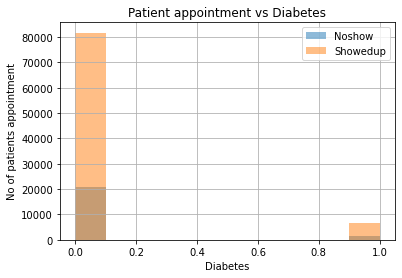

In [37]:
#Plot a graph representing those who are diabetic and are not and who showed up and didn't show up for their appointments

def Hist_plot_attendance(Diabetes, Showedup, Noshow):
    df.Diabetes[Noshow].hist(alpha=0.5, label='Noshow')
    df.Diabetes[Showedup].hist(alpha=0.5, label='Showedup')
    plt.ylabel('No of patients appointment')
    plt.xlabel('Diabetes')
    plt.title('Patient appointment vs Diabetes')
    plt.legend();

Hist_plot_attendance(df.Diabetes, Showedup, Noshow)


*102583(92.81%) are diabetic while 7943(7.19%) are not. 79.64% of those who are not diabetic showed up for their appointment while the other 20.36% didn't show up for their appointment. 82.00% of those who were diabetic showed up for their appointment while the other 18.00% did not show up.*

Therefore those with diabetes are more likely to show up for their hospital appointment.

*Above is the graphical representation of No-show Vs Diabetes*

**Does having a health challenge a predicator for showing up for their appointment?**
**Does having a health challenge responsible for patients missing their appointment?**

In [38]:
df.groupby(['Hypertension', 'Diabetes'])['No-show'].value_counts(normalize=True) * 100

Hypertension  Diabetes  No-show
0             0         No         79.078242
                        Yes        20.921758
              1         No         80.164722
                        Yes        19.835278
1             0         No         82.820764
                        Yes        17.179236
              1         No         82.408264
                        Yes        17.591736
Name: No-show, dtype: float64

*From the above results, we can see that those who had hypertension and were not diabetic had the highest percentage (82.82) of hospital appointment. Patients with both diabetes and hypertension had the second highest percentage (82.40) of showing up for their hospital appointment. 

*While those who were neither hypertensive or diabetic had the highest percentage (20.92) of not showing up for their hospital appointment.



<a id='conclusions'></a>
## Conclusions

> **Summary of Results**

*The above dataset was made up 110527 entries or hospital appointments  and 14 columns or features. There were 62299 Patient Ids and 110527 entries indicating that some patients had more than one hospital appointments. There were also 81 neighbourhoods in this dataset and no null entry.

*In analysis, No show was the dependent variable while Age, Gender, Scholarship (Bolsa Familia Program), SMS received, Hypertension and Diabetes were the independent variable. The other columns were dropped. 1 row with age of -1 was also dropped resulting in 110526 entries.

*Of the 110526 entries, 88207(79.81%) of the population showed up for their appointment while 22319(20.19%) did not show up for their appointment.

***Research Question 1 (What factors are important for us to know in order to predict if a patient will show for their scheduled appointment).

*For the gender, 71839 (65.00%) are females while 38687 (35.00%) are males. 79.69% of the females showed up for their appointment while 20.31% did not show up and 80.00% of the males showed up for their appointment and 20.00% did not show up.

*Although there is a slight difference in the percentage of men and women who showed up for their appointment, the men were more. Indicating that more men showed up for their appointment. But from the graph, it indicates that more women showed up for their appointment. This is because females are more likely to visit the hospital because maternal health is essential in any population as they are to bring to life children who would stabilise the population of any nation.

*The graph is skewed to the right with the younger population having a higher attendance, we can see the highest hospital visitation in babies below a year and the least in patients of 96 years. *

*From the graph, children below the age of 2 showed up the highest for their appointment, this could be as a result of having the highest population and having their parents especially their mothers are available to take them to the hospital.

*This is because we had a higher female population in the dataset when compared to the males. But when further analysis is done the males had a slightly higher percentage of showing up for their appointment.

*99665 (90.17%) are not on the scholarship while 10861 (9.83%) are not on the scholarship. 80.19% of those who didn't have the scholarship showed up for their appointment while 76.26% of those who had the scholarship showed up for their appointment. Therefore not having a scholarship made the patients not to miss their appointments.

*75044(67.90%) did not receive a message while 35482(32.10%) did not. 83.30% of those who did not receive a message showed up for their appointment while the other 16.70% didn't show up for their appointment. 72.43% of those who got messages for their appointment showed up while the other 27.57% did not show up. This implies that more people who did not receive an SMS showed up for their appointment.

*Those who did not have a scholarship and did not receive an SMS showed up the highest for their hospital appointment with 83.54%.

*82.70% of those who were hypertensive showed up for their appointment when compare with those were not as non-hypertensives who showed up for their appointment were 79.10%.

*Those who had hypertension and were not diabetic had the highest percentage (82.82) of hospital appointment. Patients with both diabetes and hypertension had the second highest percentage (82.40) of showing up for their hospital appointment. Therefore those who were hypertensive are more likely to show up for their appointment.

*102583(92.81%) are diabetic while 7943(7.19%) are not. 79.64% of those who are not diabetic showed up for their appointment while 82.00% of those who are diabetic showed up for their hospital appointment.Therefore those with diabetes are more likely to show up for their hospital appointment.

**In conclusion:** *Those who were younger, who did not have scholarship or sent an SMS have a higher tendency to show up for their hospital appointment. Also, those with chronic disease, hypertension and diabetes are also more likely to show up for their hospital appointment.

***Research Question 2 (What factors were responsible for patients missing their appointment?).***
*The older population had a lower number of hospital visitation, this is as a result of them having a lower population. 

*Those who were not on scholarship and did not show up were 19.81% did not show up while those who had the scholarship and didn’t show up for their appointment were 23.74%. while having scholarship made them not to show up for their appointment. Those who had scholarship and were sent a message had the highest percentage (33.78) of not showing up for their appointment.

*20.90% of those who are not hypertensive didn't show up for their appointment. while the other 17.30% hypertensives did not show up.*
the other 20.36% didn't show up for their appointment. 82.00% of those who were diabetic showed up for their appointment while the other 18.00% did not show up.*

*While those who were neither hypertensive or diabetic had the highest percentage (20.92) of not showing up for their hospital appointment.

***In conclusion:*** *Those who were older and having a scholarship without any health challenge are likely not to show up for their hospital appointment.

***Limitations of this analysis.***

*1)	The scheduled day and appointment day columns were not used in this analysis, this would have given a clearer picture as to more reasons why patients showed up and did not show up for their appointment.

*2)	Neighbourhood column was not used in this analysis as it would have shown us how location would play a role in patients showing up for their appointment.

*3)	Also, alcoholism and handicap columns were not used for the analysis which would have thrown more light into how these would have affected the patients showing up for their appointment.

*4)	Also, further data analysis can be done like regression to determine the strength of the relationship between these variables. 


In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate a Dataset(No-Show Appointment).ipynb'])

1